In [1]:
import matplotlib.pyplot as plt
import numpy as np

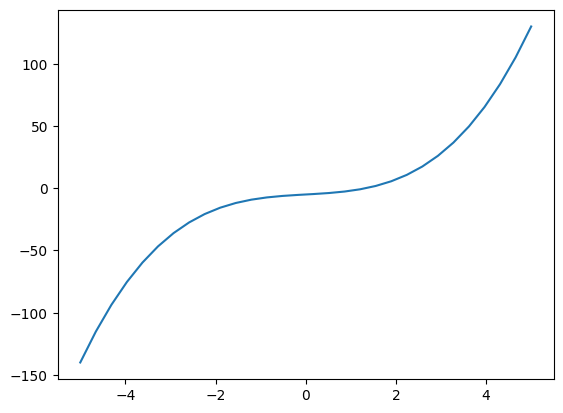

In [24]:
# Target function that we want to minimize
def f(x):
    return x ** 3 + 2 * x - 5 

domain = np.linspace(-5, 5, 30)
y = f(domain)

plt.plot(domain, y)
plt.show()

In [7]:
def relu(x):
    return np.maximum(0, x)

### Attempt 1: basic one layer network

 - Attempt to sum 2 relus to match the graph

 - Naively update each weight/bias by step size, and keep change if loss decreases

In [86]:
# each relu has two weights and biases
# graph of relu is y = w2 * relu(w1 * x + b1) + b2

def predict(x, w, b):
    prediction = 0
    for i in range(len(w)):
        prediction += w[i][1] * relu(w[i][0] * x + b[i][0]) + b[i][1]
    return prediction

domain = np.linspace(-5, 5, 30)

def sum_of_loss(w, b):
    loss_sum = 0
    for x in domain:
        loss_sum += abs(predict(x, w, b) - f(x)) ** 2
    return loss_sum

def grad(weights, biases, epochs = 1000,step_size = 0.01):
    prev_loss = float("inf")

    print("Initial Weights", weights, biases)
    print("Initial Loss", sum_of_loss(weights, biases))

    for epoch in range(epochs):

        # update each weight and bias by step size
        for type in [weights, biases]:
            for i in range(len(type)):
                for j in range(len(type[i])):
                    type[i][j] += step_size
                    new_loss = sum_of_loss(weights, biases)
                    if new_loss < prev_loss:
                        prev_loss = new_loss
                    else:
                        type[i][j] -= step_size
        
    print("Ending Weights", weights, biases)
    print("Ending Loss", sum_of_loss(weights, biases))

Initial Weights [[0.1, 0.2], [-10, 10]] [[0.1, 0.3], [10, 0]]
Initial Loss 3030518.8667721637
Ending Weights [[3.899999999999994, 3.7499999999999947], [1.000000000000008, 10.0]] [[1.0500000000000003, 0.3], [10.0, 0.0]]
Ending Loss 495276.2518845266


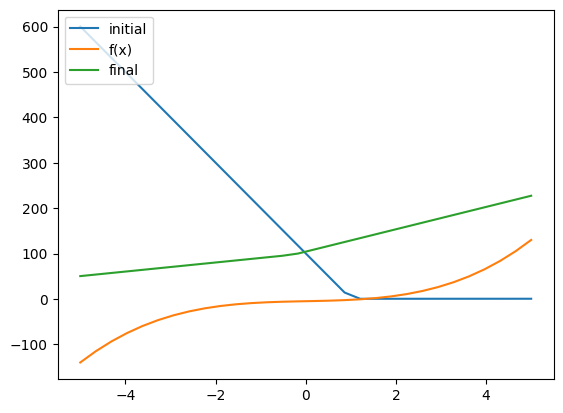

In [87]:
weights = [[0.1, 0.2], 
           [-10, 10]]
biases = [[0.1, 0.3], 
           [10, 0]]

# weights = [[0.1, 0.2]]
# biases = [[0.1, 0.3]]

step_size = 0.05
epochs = 1000

y = f(domain)
prev = predict(domain, weights, biases)

grad(weights, biases, epochs, step_size)

y2 = predict(domain, weights, biases)

plt.plot(domain, prev, label="initial")
plt.plot(domain, y, label = "f(x)")
plt.plot(domain, y2, label = "final")
plt.legend(loc="upper left")
plt.show()

### Modification - use learning rate

In [88]:
# each relu has two weights and biases
# graph of relu is y = w2 * relu(w1 * x + b1) + b2

def predict(x, w, b):
    prediction = 0
    for i in range(len(w)):
        prediction += w[i][1] * relu(w[i][0] * x + b[i][0]) + b[i][1]
    return prediction

domain = np.linspace(-5, 5, 30)

def sum_of_loss(w, b):
    loss_sum = 0
    for x in domain:
        loss_sum += abs(predict(x, w, b) - f(x)) ** 2
    return loss_sum

def grad(weights, biases, epochs = 1000,step_size = 0.01):
    prev_loss = float("inf")

    print("Initial Weights", weights, biases)
    print("Initial Loss", sum_of_loss(weights, biases))

    for epoch in range(epochs):

        # update each weight and bias by step size
        for type in [weights, biases]:
            for i in range(len(type)):
                for j in range(len(type[i])):
                    type[i][j] += step_size
                    new_loss = sum_of_loss(weights, biases)
                    if new_loss < prev_loss:
                        prev_loss = new_loss
                    else:
                        type[i][j] -= step_size
        
    print("Ending Weights", weights, biases)
    print("Ending Loss", sum_of_loss(weights, biases))

In [ ]:
weights = [[0.1, 0.2], 
           [-10, 10]]
biases = [[0.1, 0.3], 
           [10, 0]]

# weights = [[0.1, 0.2]]
# biases = [[0.1, 0.3]]

step_size = 0.05
epochs = 1000

y = f(domain)
prev = predict(domain, weights, biases)

grad(weights, biases, epochs, step_size)

y2 = predict(domain, weights, biases)

plt.plot(domain, prev, label="initial")
plt.plot(domain, y, label = "f(x)")
plt.plot(domain, y2, label = "final")
plt.legend(loc="upper left")
plt.show()